# Import data

In [1]:
import pandas as pd

df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Creating a basic MLP

In [2]:
# Add other steps
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<Axes: >

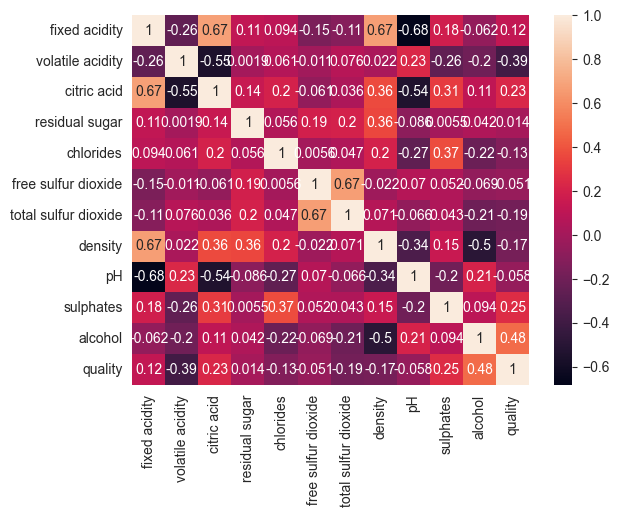

In [4]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='quality', ylabel='Count'>

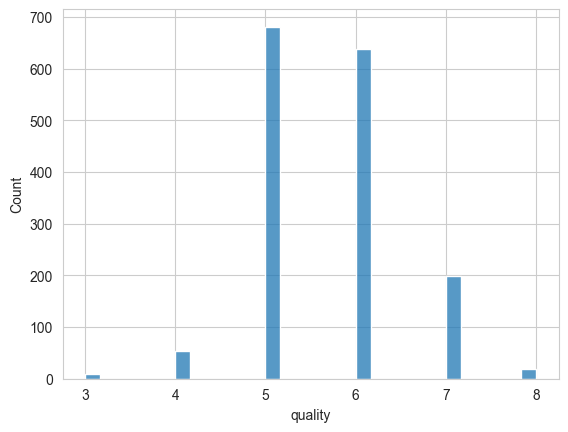

In [26]:
sns.histplot(data=df, x='quality')

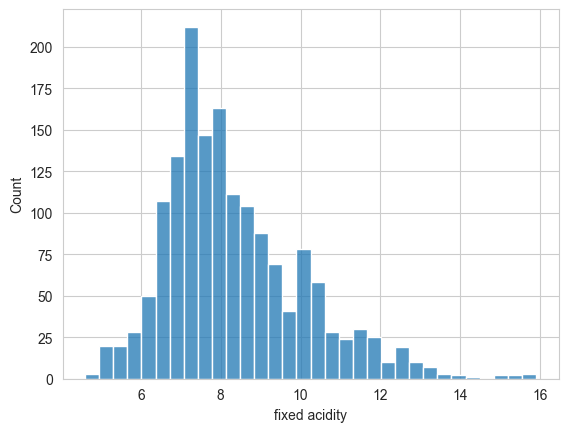

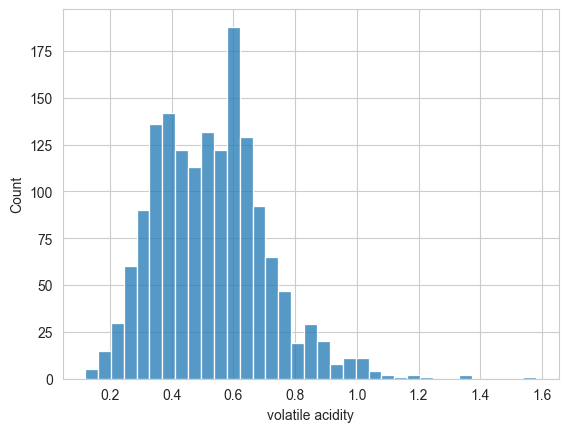

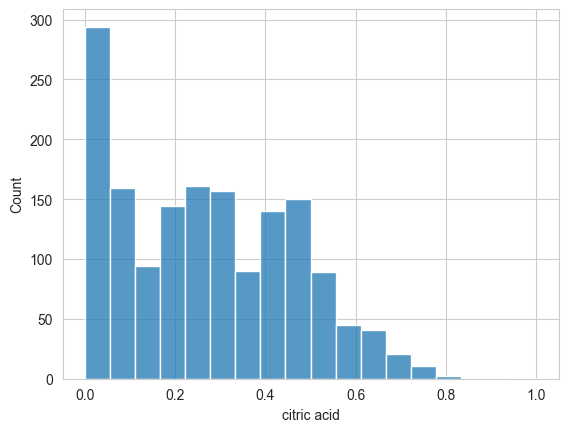

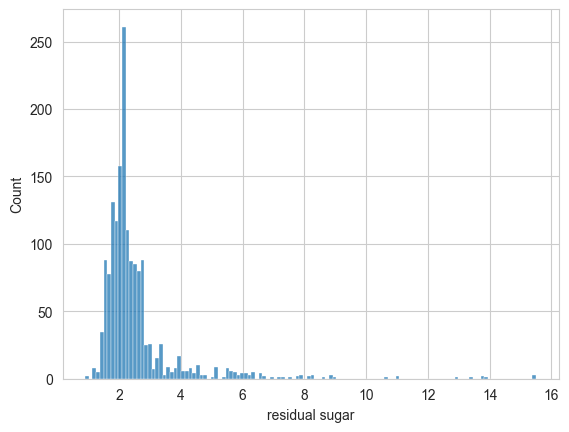

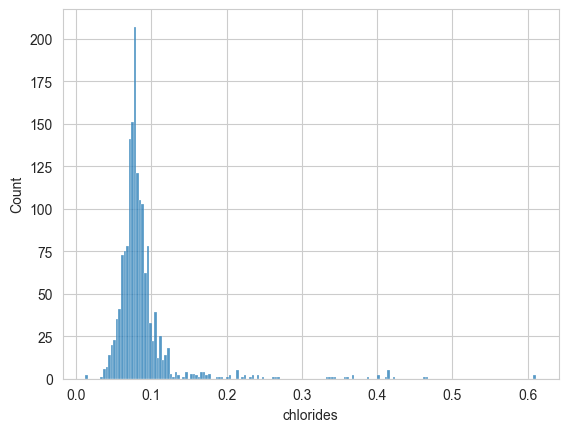

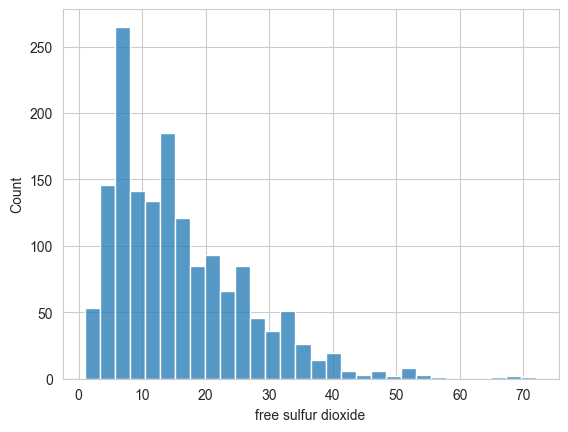

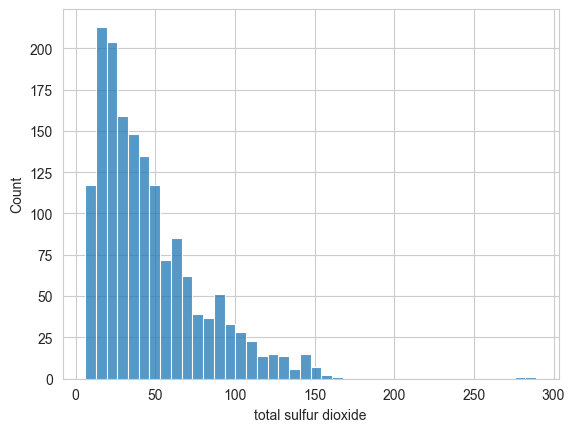

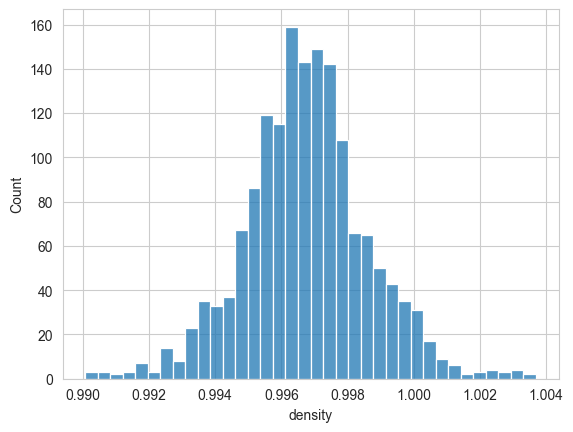

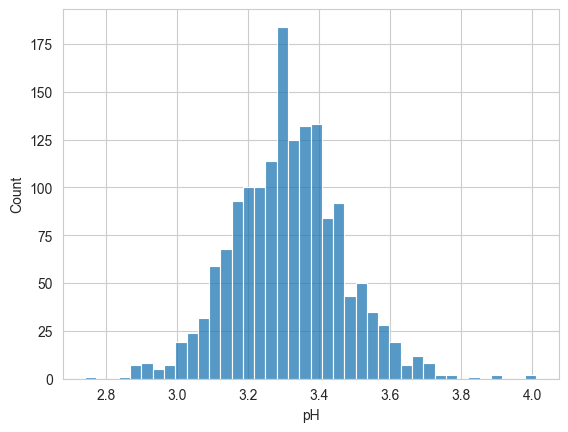

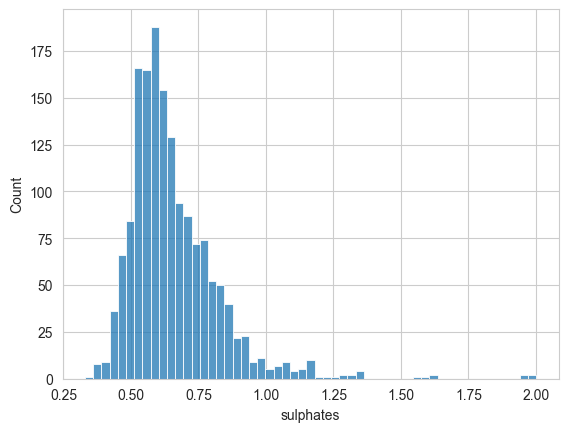

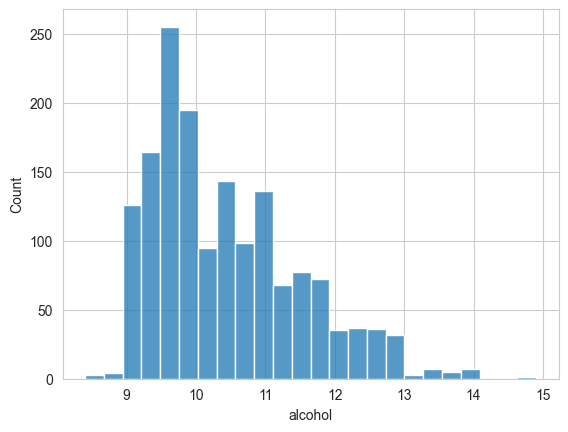

In [27]:
import matplotlib.pyplot as plt

for col in df.columns[:-1]:
    plt.figure()
    sns.histplot(df[col], )

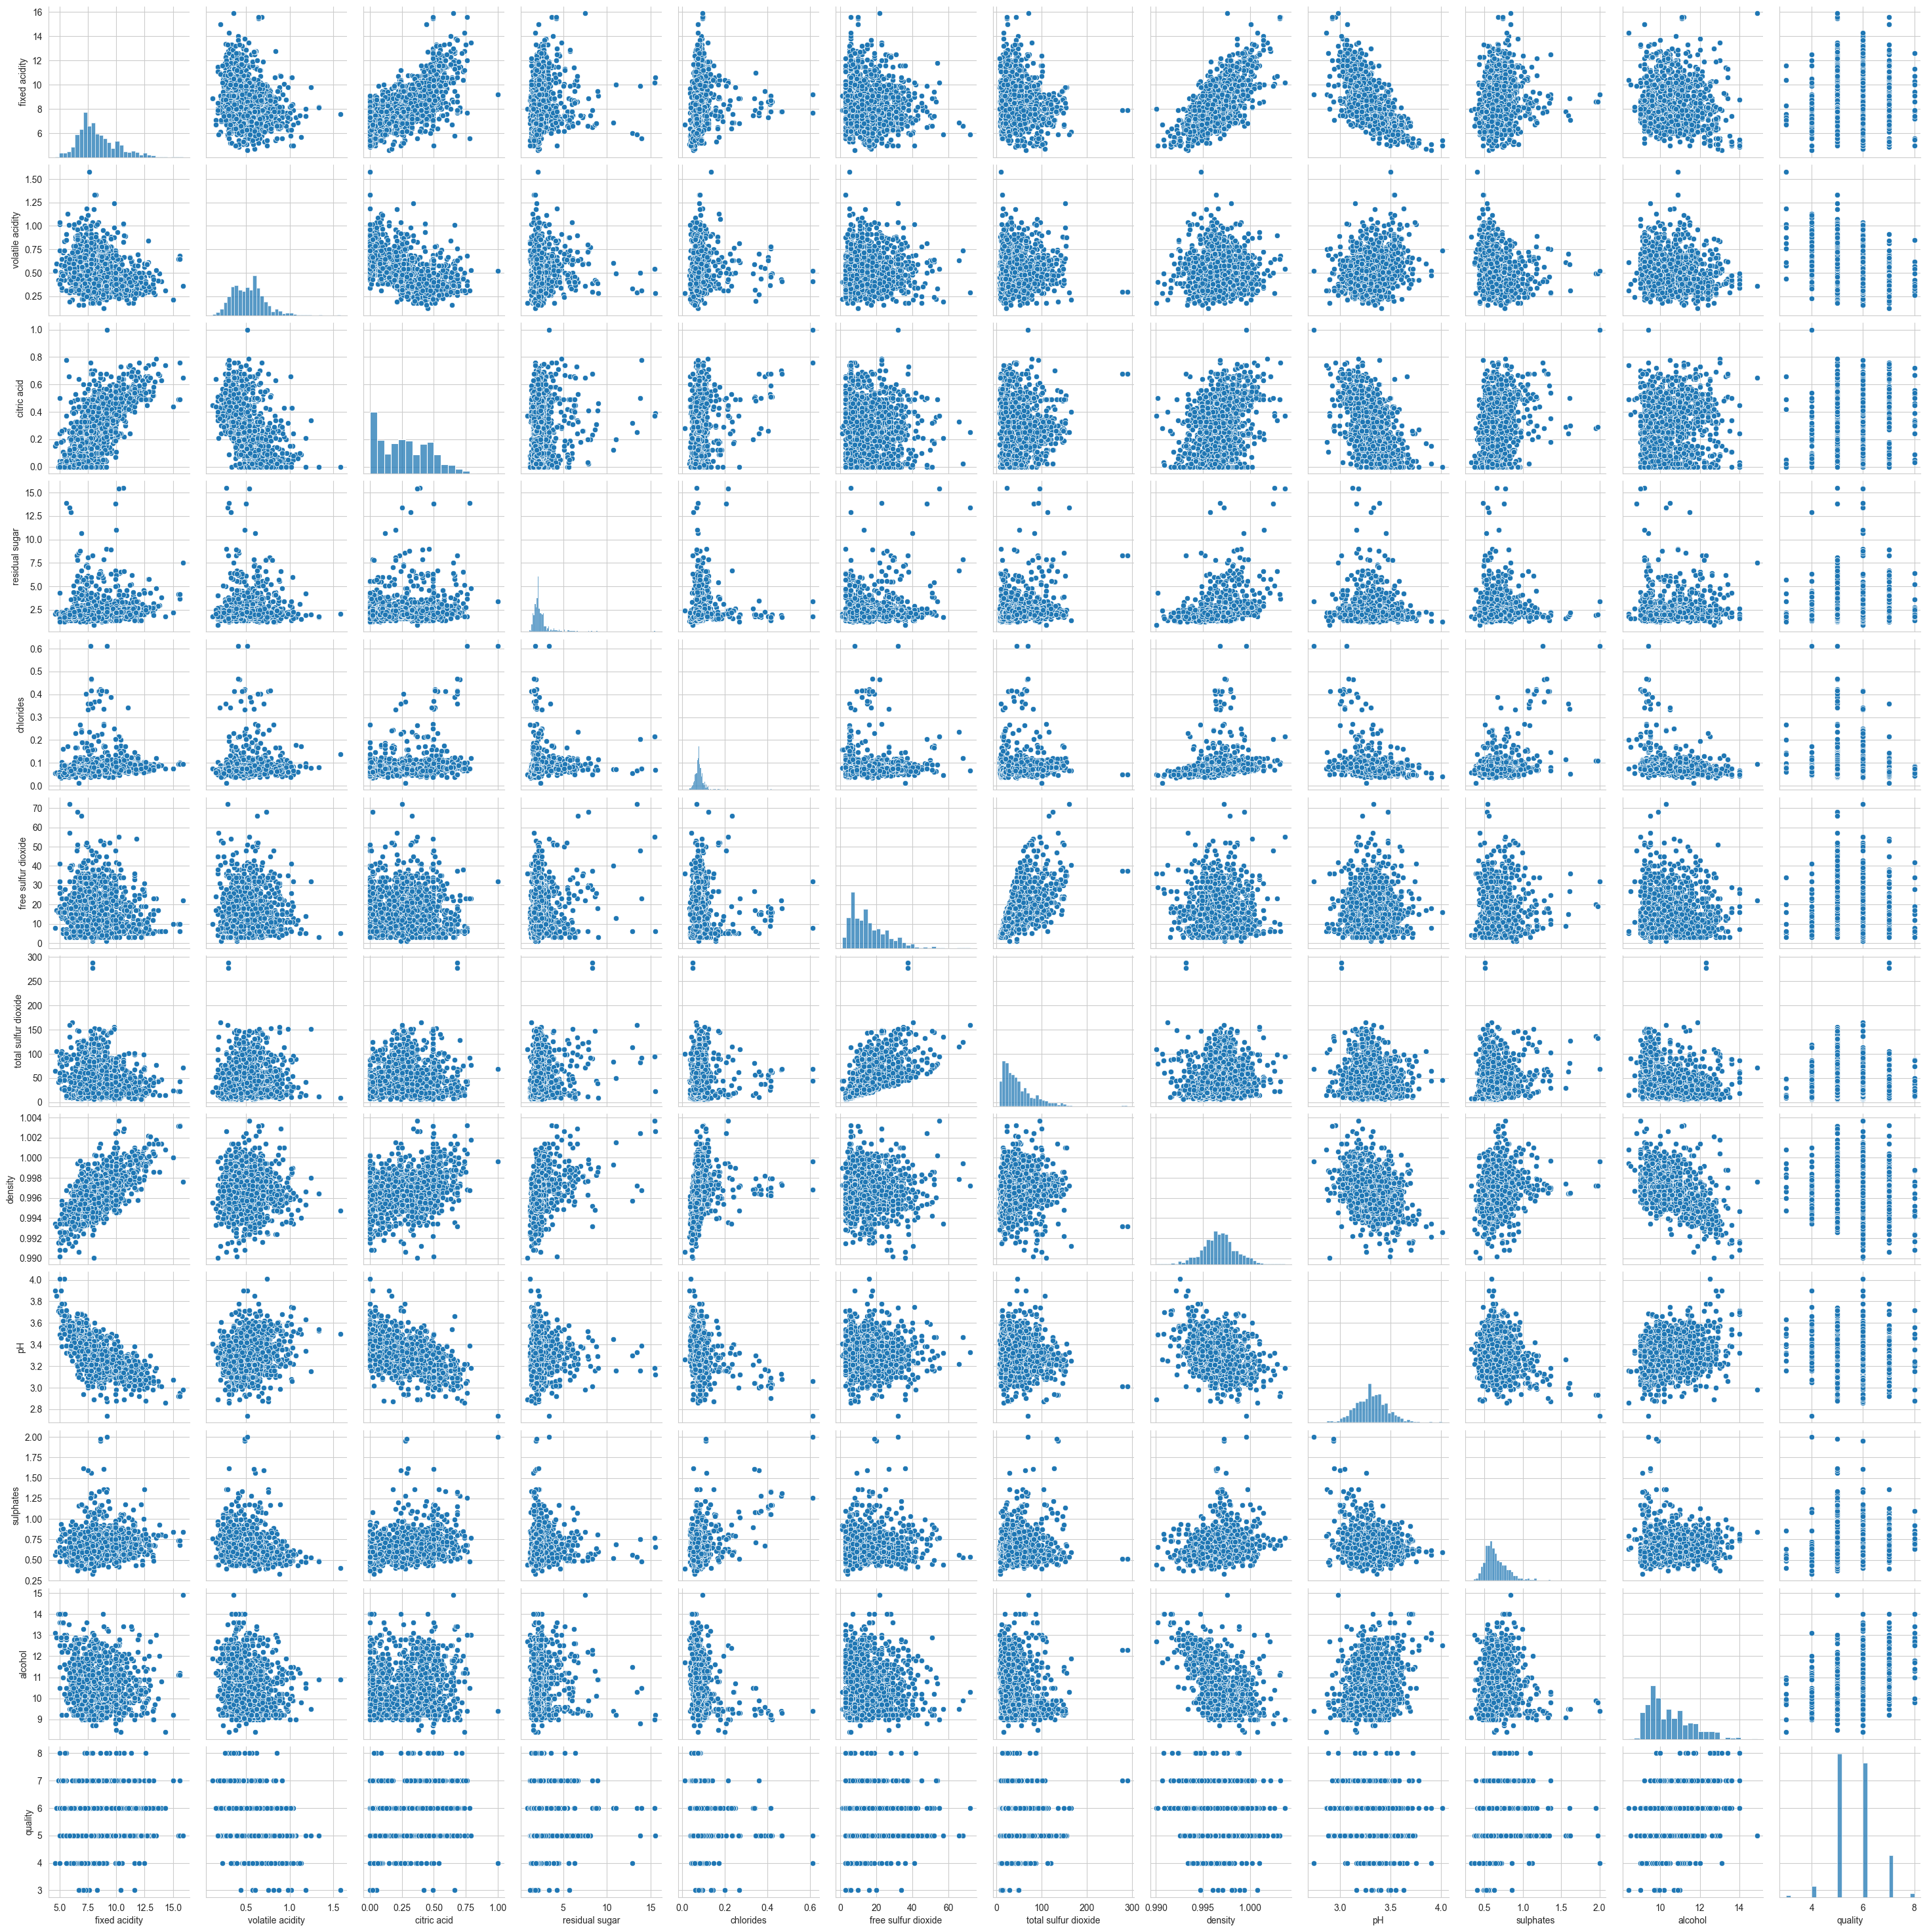

In [158]:
sns.pairplot(data=df)

In [5]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [57]:
from sklearn.model_selection import train_test_split

train_x, everything_else_x, train_y, everything_else_y = train_test_split(X, Y, test_size=.3, random_state=42)

In [58]:
valid_x, test_x, valid_y, test_y = train_test_split(everything_else_x, everything_else_y, test_size=.5, random_state=42)

In [59]:
print(valid_x.shape)
print(test_x.shape)

(240, 11)
(240, 11)


In [60]:
import torch

train_x, test_x, valid_x = map(torch.tensor, (train_x.to_numpy(), test_x.to_numpy(), valid_x.to_numpy()))
train_x = train_x.float()
test_x = test_x.float()
valid_x = valid_x.float()

In [61]:
train_y, test_y, valid_y = map(torch.tensor, (train_y.to_numpy(), test_y.to_numpy(), valid_y.to_numpy()))
train_y = train_y.float()
test_y = test_y.float()
valid_y = valid_y.float()

In [62]:
from torch.utils.data import Dataset

class WineDataset(Dataset):
    def __init__(self, x ,y):
        self.x = x
        self.y = y
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return len(self.y)
    

In [63]:
wine_train = WineDataset(train_x, train_y)

In [64]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=wine_train, batch_size=8)

In [88]:
class WineMLP1(torch.nn.Module):
    def __init__(self, n_inputs, hidden_size, output_size):
        super(WineMLP1, self).__init__()
        self.inputs = n_inputs
        self.hidden = hidden_size
        self.outputs = output_size
        
        self.linear1 = torch.nn.Linear(self.inputs, self.hidden)
        self.linear2 = torch.nn.Linear(self.hidden, self.outputs)
        
        self.relu = torch.nn.ReLU()
        
    def forward(self, X):
        out = self.linear1(X)
        out = self.relu(out)
        out = self.linear2(out)
        return out

In [66]:
model = WineMLP1(train_x.shape[1], 5, 1)

In [67]:
criterion = torch.nn.MSELoss()
optimiser = torch.optim.SGD(params=model.parameters(), lr=.0001)

In [109]:
epochs = 1000

loss_valid = []
loss_train = []

for epoch in range(epochs):
    model.train()
    # Batch the data
    epoch_loss_train = []
    for features, targets in train_loader:
        output = model.forward(features) # Get model hypotheses
        # Calculate a loss
        loss = criterion(output.squeeze(1), targets)
        epoch_loss_train.append(loss.item())
        optimiser.zero_grad() # remove any previous losses
        loss.backward() # Calculate the current losses backward through the MLP
        optimiser.step() # Apply to the model itself
    # Calculate the training loss per epoch
    loss_train.append(sum(epoch_loss_train) / len(epoch_loss_train))
    
    # Per epoch, get validation performance
    model.eval() # Puts the model in evaluation mode
    valid_hyp = model.forward(valid_x)
    loss_valid.append(criterion(valid_hyp.squeeze(1), valid_y).item())
    

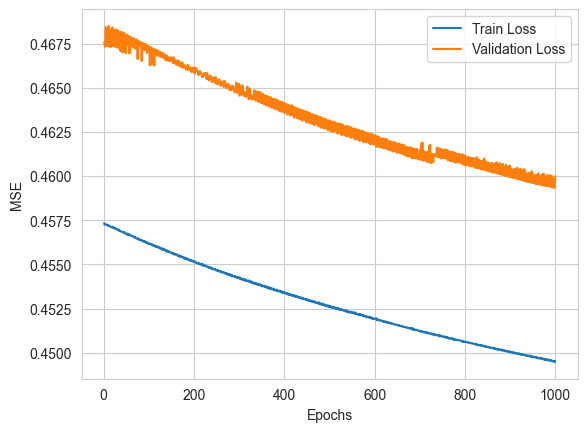

In [110]:
import matplotlib.pyplot as plt
import numpy as np

def plot_loss_curves(epochs, loss_train, loss_valid):
    plt.plot(epochs, loss_train, label='Train Loss')
    plt.plot(epochs, loss_valid, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()


plot_loss_curves(np.linspace(1, epochs, epochs).astype(int), loss_train, loss_valid)

In [112]:
test_hyp = model.forward(test_x)
criterion(test_hyp.squeeze(1), test_y)

tensor(0.4535, grad_fn=<MseLossBackward0>)

The base MLP appears to perform pretty well. With a final MSE of .4535, it comes pretty close to accurately predicting the quality of the wine. 

# Making changes to basic MLP

In [121]:
# Add steps
class WineMLPNorm(torch.nn.Module):
    def __init__(self, n_inputs, hidden_size, output_size):
        super(WineMLPNorm, self).__init__()
        self.inputs = n_inputs
        self.hidden = hidden_size
        self.outputs = output_size
        
        self.linear1 = torch.nn.Linear(self.inputs, self.hidden)
        self.norm1 = torch.nn.BatchNorm1d(self.hidden)
        self.linear2 = torch.nn.Linear(self.hidden, self.outputs)
        self.norm2 = torch.nn.BatchNorm1d(self.outputs)
        
        self.relu = torch.nn.ReLU()
        
    def forward(self, X):
        out = self.linear1(X)
        out = self.norm1(out)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.norm2(out)
        return out

In [133]:
from sklearn.preprocessing import StandardScaler

scaler_x = StandardScaler()
train_norm_x = scaler_x.fit_transform(train_x)
valid_norm_x = scaler_x.transform(valid_x)
test_norm_x = scaler_x.transform(test_x)

train_norm_x, test_norm_x, valid_norm_x = map(torch.tensor, (train_norm_x, test_norm_x, valid_norm_x))
train_norm_x = train_norm_x.float()
test_norm_x = test_norm_x.float()
valid_norm_x = valid_norm_x.float()

In [134]:
wine_train1 = WineDataset(train_norm_x, train_y)
train_loader1 = DataLoader(dataset=wine_train1, batch_size=8)

In [160]:
model = WineMLPNorm(train_norm_x.shape[1], 5, 1)

criterion = torch.nn.MSELoss()
optimiser = torch.optim.SGD(params=model.parameters(), lr=.0001)

In [162]:
epochs = 1000

loss_valid = []
loss_train = []

for epoch in range(epochs):
    model.train()
    # Batch the data
    epoch_loss_train = []
    for features, targets in train_loader1:
        output = model.forward(features) # Get model hypotheses
        # Calculate a loss
        output = output.squeeze(1)
        
        loss = criterion(output, targets)
        epoch_loss_train.append(loss.item())
        optimiser.zero_grad() # remove any previous losses
        loss.backward() # Calculate the current losses backward through the MLP
        optimiser.step() # Apply to the model itself
    # Calculate the training loss per epoch
    loss_train.append(sum(epoch_loss_train) / len(epoch_loss_train))
    
    # Per epoch, get validation performance
    model.eval() # Puts the model in evaluation mode
    valid_hyp = model.forward(valid_norm_x)
    loss_valid.append(criterion(valid_hyp.squeeze(1), valid_y).item())

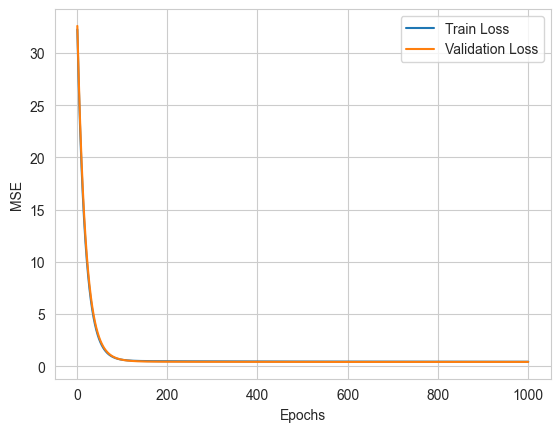

In [163]:
plot_loss_curves(np.linspace(1, epochs, epochs).astype(int), loss_train, loss_valid)

In [165]:
test_hyp = model.forward(test_norm_x)
criterion(test_hyp.squeeze(1), test_y)

tensor(0.4176, grad_fn=<MseLossBackward0>)

In [166]:
optimiser = torch.optim.SGD(params=model.parameters(), lr=.01)

epochs = 1000

loss_valid = []
loss_train = []

for epoch in range(epochs):
    model.train()
    # Batch the data
    epoch_loss_train = []
    for features, targets in train_loader1:
        output = model.forward(features) # Get model hypotheses
        # Calculate a loss
        output = output.squeeze(1)
        
        loss = criterion(output, targets)
        epoch_loss_train.append(loss.item())
        optimiser.zero_grad() # remove any previous losses
        loss.backward() # Calculate the current losses backward through the MLP
        optimiser.step() # Apply to the model itself
    # Calculate the training loss per epoch
    loss_train.append(sum(epoch_loss_train) / len(epoch_loss_train))
    
    # Per epoch, get validation performance
    model.eval() # Puts the model in evaluation mode
    valid_hyp = model.forward(valid_norm_x)
    loss_valid.append(criterion(valid_hyp.squeeze(1), valid_y).item())

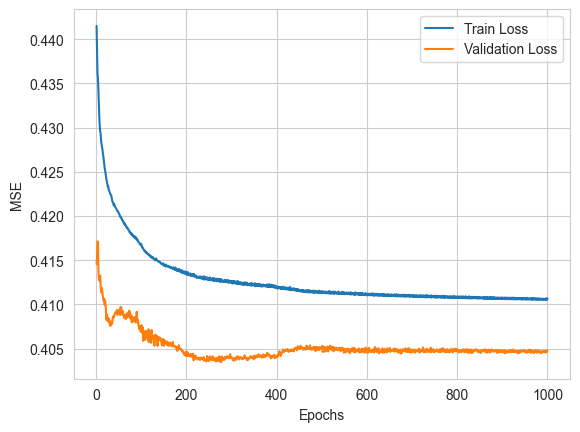

In [167]:
plot_loss_curves(np.linspace(1, epochs, epochs).astype(int), loss_train, loss_valid)

In [169]:
test_hyp = model.forward(test_norm_x)
criterion(test_hyp.squeeze(1), test_y)

tensor(0.4182, grad_fn=<MseLossBackward0>)

In [170]:
class WineMLPNorm2(torch.nn.Module):
    def __init__(self, n_inputs, hidden_size, output_size):
        super(WineMLPNorm2, self).__init__()
        self.inputs = n_inputs
        self.hidden = hidden_size
        self.outputs = output_size
        
        self.linear1 = torch.nn.Linear(self.inputs, self.hidden)
        self.norm1 = torch.nn.BatchNorm1d(self.hidden)
        self.linear2 = torch.nn.Linear(self.hidden, self.hidden)
        self.norm2 = torch.nn.BatchNorm1d(self.hidden)
        self.linear3 = torch.nn.Linear(self.hidden, self.outputs)
        self.norm3 = torch.nn.BatchNorm1d(self.outputs)
        
        self.relu = torch.nn.ReLU()
        
    def forward(self, X):
        out = self.linear1(X)
        out = self.norm1(out)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.norm2(out)
        out = self.linear3(out)
        out = self.norm3(out)
        return out

In [173]:
model = WineMLPNorm2(train_norm_x.shape[1], 5, 1)

criterion = torch.nn.MSELoss()
optimiser = torch.optim.SGD(params=model.parameters(), lr=.0001)

epochs = 1000

loss_valid = []
loss_train = []

for epoch in range(epochs):
    model.train()
    # Batch the data
    epoch_loss_train = []
    for features, targets in train_loader1:
        output = model.forward(features) # Get model hypotheses
        # Calculate a loss
        output = output.squeeze(1)
        
        loss = criterion(output, targets)
        epoch_loss_train.append(loss.item())
        optimiser.zero_grad() # remove any previous losses
        loss.backward() # Calculate the current losses backward through the MLP
        optimiser.step() # Apply to the model itself
    # Calculate the training loss per epoch
    loss_train.append(sum(epoch_loss_train) / len(epoch_loss_train))
    
    # Per epoch, get validation performance
    model.eval() # Puts the model in evaluation mode
    valid_hyp = model.forward(valid_norm_x)
    loss_valid.append(criterion(valid_hyp.squeeze(1), valid_y).item())

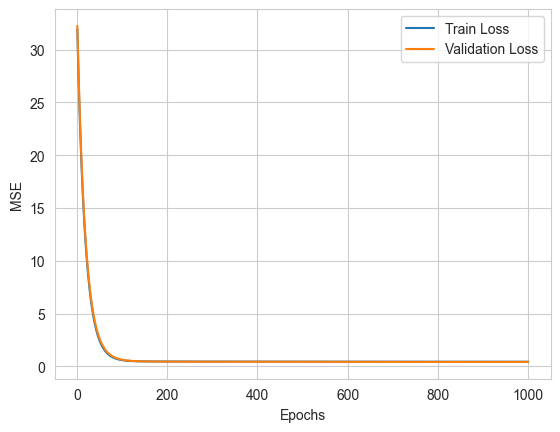

In [174]:
plot_loss_curves(np.linspace(1, epochs, epochs).astype(int), loss_train, loss_valid)

In [175]:
test_hyp = model.forward(test_norm_x)
criterion(test_hyp.squeeze(1), test_y)

tensor(0.4305, grad_fn=<MseLossBackward0>)

The first change I made to the MLP was to normalize the data and the layers. This allows changes in each variable to have equal effect on the outcome variable. It led to substantial improvement in the performance, lowering the MSE to .4176.

The second change I made was to increase the learning rate to allow bigger changes to happen over the training of the data. This did not change the performance from the normalization step. 

The final change I made was to add an additional hidden layer to pick up on any non-linear patterns. This ended up decreasing the performance. I think the reason that the performance decreased was because the model was too complicated for the relationships in the data. The best model was the first normalized.

# Optional: Implementing the MLP